<a href="https://colab.research.google.com/github/Eduardo775/CENIDET/blob/main/Optimizaci%C3%B3n_de_Hiperpar%C3%A1metros_Avances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de Hiperparámetros en Modelsos de Aprendizaje automático

### **Código muestra para problemas de Clasificación**  
**Conjunto de datos usado:**  
&nbsp; Cleveland de la Universidad de California Irvine (UCI)

**Algoritmos de Aprendizaje Automático utilizados:**  
&nbsp; Random forest (RF)

**Algoritmos de Optimización de Hiperparámetros utilizados:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)

**Métrica de Rendimiento:**  
&nbsp; Classification accuracy

## Contexto

Desarrollo del trabajo de tesis: Optimización de Hiperparámetros en Modelos de  Aprendizaje Automático para la Detección de Enfermedades Cardiovasculares (ECV). La principal aportación científica de esta investigación es el análisis y la  aplicación de las técnicas de optimización que determinan la mejor combinación  de valores de los hiperparámetros en ciertos algoritmos y diferentes conjuntos  de datos de ECV.

El proyecto de investigación sobre optimización de modelos de aprendizaje automático para la detección de ECV se estructura, específicamente, sobre la  base de conjuntos de datos que presentan esencialmente datos de diagnóstico de  varios pacientes a los que se les diagnosticó previamente una posible ECV. Los  conjuntos de datos que se están contemplando en el desarrollo de la tesis  provienen del repositorio de aprendizaje automático de la Universidad de  California, Invirne (UCI, 2022). Estos datan del 1988: Cleveland, Hungría,  Suiza y Long Beach V.

## Bibliotecas utilizadas

In [151]:
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

## Indormación del conjunto de datos Cleveland
El conjunto de datos contiene 76 características, incluido el atributo de predicción, pero todos los experimentos publicados hacen referencia  a la utilización de un subconjunto de 14 de ellos 

1.- EDAD: edad en años
2.- SEXO: sexo (1= masculino; 0= femenino)
3.- CP: tipo de dolor de pecho

        -- Valor 1: angina típica
        -- Valor 2: angina atípica
        -- Valor 3: dolor no anginoso
        -- Valor 4: asintomático

4.-TRESBPS: presión arterial en reposo (en mm Hg al ingreso al hospital)

5.-CHOL: colestoral sérico en mg/dl

6.-FBS: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

7.-RESTECG:resultados electrocardiográficos en reposo

        -- Valor 0: normal
        -- Valor 1: tener anormalidad de onda ST-T (inversiones de onda T y/o ST
                    elevación o depresión de > 0,05 mV)
        -- Valor 2: mostrando hipertrofia ventricular izquierda probable o definitiva según el criterio de Estes

8.-THALACH:frecuencia cardíaca máxima alcanzada

9.-EXANG:angina inducida por ejercicio (1 = sí; 0 = no)

10.-OLDPEAK:depresión del ST inducida por el ejercicio en relación con el reposo

11.-SLOPE: la pendiente del segmento ST de ejercicio máximo

        -- Valor 1: ascendente
        -- Valor 2: plano
        -- Valor 3: descendente

12.-CA:número de vasos principales (0-3) coloreados por fluoroscopia

13.-THAL (thalassemia): 3 = normal; 6 = defecto fijo; 7 = defecto reversible; (trastorno sanguíneo hereditario que hace que tu cuerpo tenga menos hemoglobina de lo normal)

14.-CLASE:diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)

        -- Valor 0: < 50% estrechamiento del diámetro
        -- Valor 1: > 50% estrechamiento del diámetro

## Cargar el Conjunto de Datos

In [129]:
#read_csv ya que el formato de archivo de los datos descargados es csv
df = pd.read_csv('/content/sample_data/cleveland.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,clase
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
4,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0


## Análisis de los datos

In [ ]:
# Información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  class     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# valores estadísticos básicos de nuestro conjunto de datos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.676568,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931963,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# Ver la cantidad de valores nulos en cada una de las características
print('Valores nulos\n')
df.isnull().sum()

Valores nulos



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

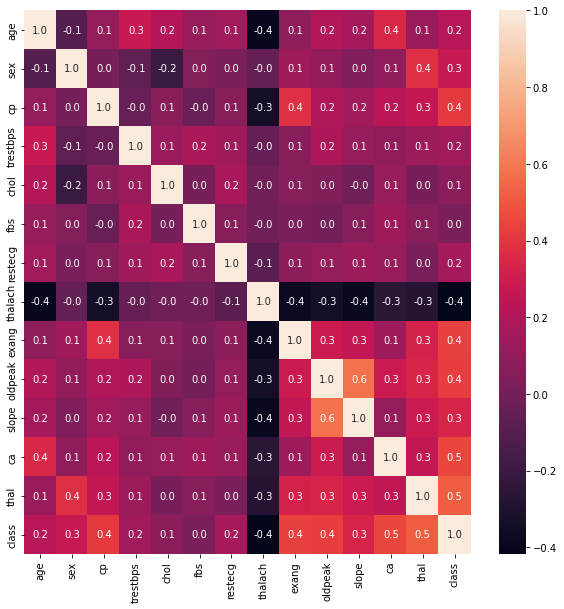

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

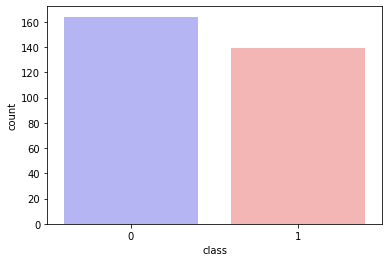

In [ ]:
# Distribución class (0= no tiene ECV; 1= si tiene ECV)
sns.countplot(x="class", data=df, palette="bwr")
plt.show()

In [ ]:
# Número de instancias que corresponden a mujeres/hombres
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
all_ = len(df.sex)
print("Porcentaje de registros Femeninos: {:.2f}%".format((countFemale / all_*100)))
print("Percentaje de registros Masculino: {:.2f}%".format((countMale / all_*100)))

Porcentaje de registros Femeninos: 32.01%
Percentaje de registros Masculino: 67.99%


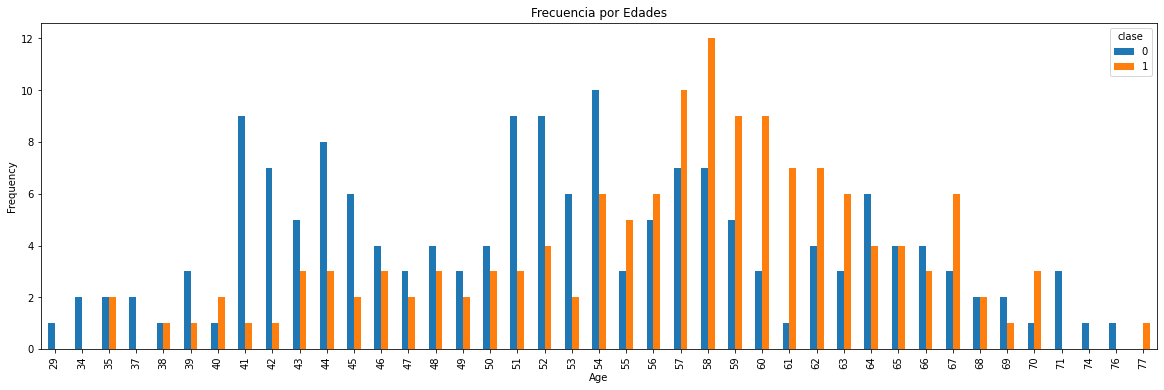

In [ ]:
# Distribución por edades
pd.crosstab(df.age,df.clase).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia por Edades')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

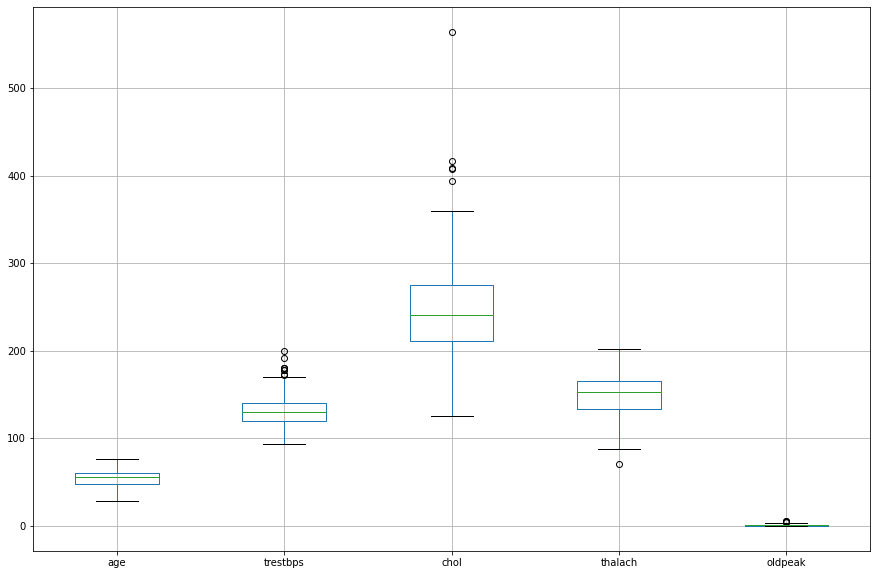

In [130]:
#Visualizar los datos atípicos (sin escalamiento)
plt.figure(figsize=(15,10))
#Columnas numéricas
numeric_col = ['age','trestbps','chol','thalach','oldpeak']
df.boxplot(numeric_col)

In [131]:
# Recorte/Eliminación de valores atípicos (Aunque no es una buena práctica a seguir)

#z-score
# encontrar el valor absoluto de la puntuación z para cada observación
z = np.abs (stats.zscore (df))

# solo mantenga las filas en el marco de datos con todas las puntuaciones z inferiores al valor absoluto de 3 
df = df [(z <3) .all (axis = 1)]

# encontrar cuántas filas quedan en el marco de datos 
df.shape 

(294, 14)

## Escalamiento de datos

In [132]:
# Escalamiento de los datod
y = df['clase'] #variable objetivo
X = df.drop(['clase'], axis = 1) #atributos
dfcopy=X

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit_transform(dfcopy)
dfc=pd.DataFrame(transformer)
dfc.columns=dfcopy.columns

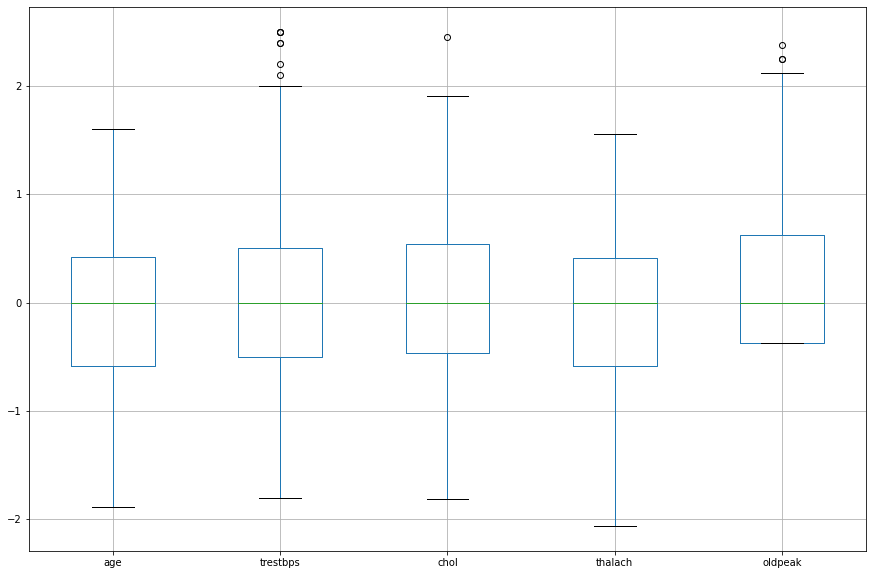

In [133]:
#Visualizar los datos atípicos
plt.figure(figsize=(15,10))
#Columnas numéricas
numeric_col = ['age','trestbps','chol','thalach','oldpeak']
dfc.boxplot(numeric_col)

In [134]:
# Así queda en nuevo conjunto de datos
dfc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.581818,0.0,-2.0,0.75,-0.111554,1.0,1.0,-0.095238,0.0,1.0625,1.0,0.0,0.75
1,-1.309091,0.0,0.0,0.00,0.159363,0.0,0.0,1.079365,0.0,1.8125,1.0,0.0,0.00
2,-1.018182,-1.0,-1.0,0.00,-0.573705,0.0,1.0,0.603175,0.0,0.5000,-1.0,0.0,0.00
3,0.072727,0.0,-1.0,-0.50,-0.063745,0.0,0.0,0.793651,0.0,0.1250,-1.0,0.0,0.00
4,0.145455,-1.0,1.0,-0.50,1.816733,0.0,0.0,0.317460,1.0,0.0000,-1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.600000,0.0,1.0,-0.25,1.019920,0.0,1.0,0.285714,1.0,-0.3750,-1.0,3.0,0.00
290,0.654545,0.0,1.0,0.75,-0.446215,0.0,1.0,-0.666667,0.0,0.8750,0.0,2.0,0.75
291,-1.236364,0.0,-2.0,-0.50,-0.143426,0.0,0.0,0.920635,1.0,2.0000,0.0,0.0,1.00
292,0.436364,0.0,1.0,0.40,-1.179283,0.0,1.0,-0.888889,1.0,1.8750,0.0,1.0,0.00


## Selección de atributos utilizando (chi2)

In [135]:
# Identificar las características con mayor importancia para la variable de resultado Enfermedades del Corazón

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separar las variables independientes y dependientes
X = df.iloc[:,0:13]  # columnas independientes
y = df.iloc[:,-1]    # variable objetivo

# # aplicar la clase SelectKBest para extraer las 10 mejores características
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concatenar dos dataframe para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Atributo','Score']  # nombre de las columnas del dataframe
#print(featureScores.nlargest(11,'Score'))  

#Mostrar el score de las características
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Atributo,Score
7,thalach,175.185566
11,ca,76.270904
12,thal,62.792283
9,oldpeak,60.627008
8,exang,37.637223
4,chol,30.043141
0,age,22.320358
2,cp,14.545325
3,trestbps,9.460945
6,restecg,8.547156


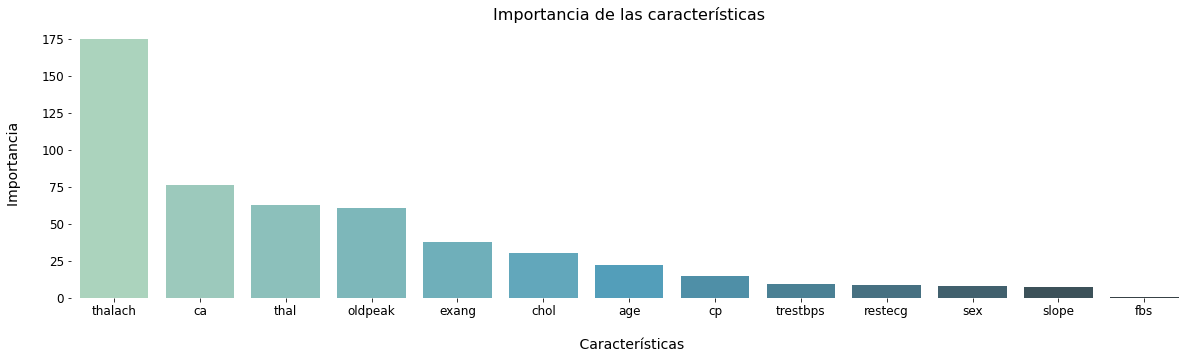

In [136]:
# visualización de la selección de características
plt.figure(figsize=(20,5))
sns.barplot(x='Atributo', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Importancia de las características', fontsize=16)
plt.xlabel('\n Características', fontsize=14)
plt.ylabel('Importancia \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [137]:
# Seleccionar las 8 características más impactantes para la variable objetivo
features_list = featureScores["Atributo"].tolist()[:8]
features_list

['thalach', 'ca', 'thal', 'oldpeak', 'exang', 'chol', 'age', 'cp']

In [138]:
# Crear un nuevo dataframe con las características seleccionadas y la variable objetivo
X = dfc[['thalach', 'ca', 'thal', 'oldpeak', 'exang', 'chol', 'age', 'cp']]
X.head()

,thalach,ca,thal,oldpeak,exang,chol,age,cp
0,-0.095238,0.0,0.75,1.0625,0.0,-0.111554,0.581818,-2.0
1,1.079365,0.0,0.00,1.8125,0.0,0.159363,-1.309091,0.0
2,0.603175,0.0,0.00,0.5000,0.0,-0.573705,-1.018182,-1.0
3,0.793651,0.0,0.00,0.1250,0.0,-0.063745,0.072727,-1.0
4,0.317460,0.0,0.00,0.0000,1.0,1.816733,0.145455,1.0


In [171]:
# Función que imprimirá todos los detalles importantes de cada entrenamiento
def print_score(clf, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
  print("Resultado de prueba:\n================================================")        
  print(f"Puntaje Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"REPORTE DE CLASIFICACIÓN:\n{clf_report}")
  print("_______________________________________________")
  print(f"Matrix de Confusión: \n {confusion_matrix(y_test, pred)}\n")
  cm=confusion_matrix(y_test,pred)
      

Separar el conjunto de entrenamiento y el de prueba

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelos de aprendizaje automático de referencia

Using 3-Fold Cross-Validation

In [358]:
#Random Forest
from sklearn.model_selection import cross_validate
clf = RandomForestClassifier()

scores = cross_val_score(clf,X_train, y_train, cv=9,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.8142292490118577


## Algoritmo 1: Grid Search
Buscar todas las configuraciones de hiperparámetros dadas

**Ventajas:**
* Aplicación sencilla.  

**Desventajas:**  
* El tiempo que consume,
* Sólo es eficiente con los HPs categóricos.

In [274]:
#Random Forest
from sklearn.model_selection import GridSearchCV

# Espacio de configuración de los hiperparámetros
rf_params = {
    'n_estimators': [10, 20, 30, 35, 40],
    'max_features': ['sqrt',0.5,0.7,0.9],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1,2,4,8],
    "bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=9, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))



{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 10}
Accuracy:0.8530961791831357


## Algoritmo 2: Random Search
Buscar aleatoriamente combinaciones de hiperparámetros en el espacio de búsqueda

**Ventajas:**
* Más eficiente que la GS..
* Activar la paralelización.

**Desventajas:**  
* No tener en cuenta los resultados anteriores.
* No es eficiente con los HP condicionales.

In [305]:
#Random Forest
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [8,10, 20, 30, 35, 40],
    'max_features': ['sqrt',0.5,0.7],
    'max_depth': [2, 3, 5, 7, 9],
    'min_samples_leaf': [1,2,4,8,10],
    "bootstrap":[True,False],
    "criterion":['gini','entropy']
}
n_iter_search=22 # El número de iteraciones está fijado en 22, puede aumentar este número si el tiempo lo permite
clf = RandomForestClassifier(random_state=42)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=9,scoring='accuracy')
Random.fit(X_train, y_train)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'n_estimators': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}
Accuracy:0.8487044356609573


## HPO Algorithm 3: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

## HPO Algorithm 4: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

In [251]:
pip install scikit-BayesSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-BayesSearchCV (from versions: none)
ERROR: No matching distribution found for scikit-BayesSearchCV


### Using skopt.BayesSearchCV

In [341]:
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,8),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['gini','entropy'],
    "bootstrap":[True,False]
}
clf = RandomForestClassifier()
Bayes = BayesSearchCV(clf, rf_params,cv=9,n_iter=22, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X_train, y_train)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 7), ('max_features', 2), ('min_samples_leaf', 2), ('min_samples_split', 3), ('n_estimators', 13)])
Accuracy:0.8530961791831356


### Using skopt.gp_minimize

In [270]:
#Random Forest
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = RandomForestClassifier()
# Define the hyperparameter configuration space
space  = [Integer(10, 100, name='n_estimators'),
          Integer(5, 50, name='max_depth'),
          Integer(1, 64, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['gini', 'entropy'], name='criterion'),]
# Define the objective function
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=9, n_jobs=-1,scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parall

ValueError: ignored

## HPO Algorithm 5: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [ ]:
#Random Forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    #print("ROC-AUC {:.3f} params {}".format(score, params))

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 64, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.76it/s, best loss: -0.9348679045482652]
Random Forest: Hyperopt estimated optimum {'n_estimators': 95.0, 'max_features': 13.0, 'max_depth': 39.0, 'min_samples_split': 3.0, 'min_samples_leaf': 2.0, 'criterion': 0}
